# Gamblers problem

In [1]:
import sys

sys.path.insert(0,'../')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from rl_algorithms.policy_iteration_gambler_implementation import Gambler_policy_iteration
from simulations.gambler import gamblers_problem

In [3]:
gambler = gamblers_problem()

In [4]:
HEADS_PROBABILITY = 0.4

# Policy iteration strategy

In [5]:
gambling_problem = Gambler_policy_iteration(heads_probability=HEADS_PROBABILITY)

  2%|▏         | 1613/100000 [00:01<01:57, 833.88it/s]

Converged to optimal policy in 1,613 iterations.


## Value function visualisation

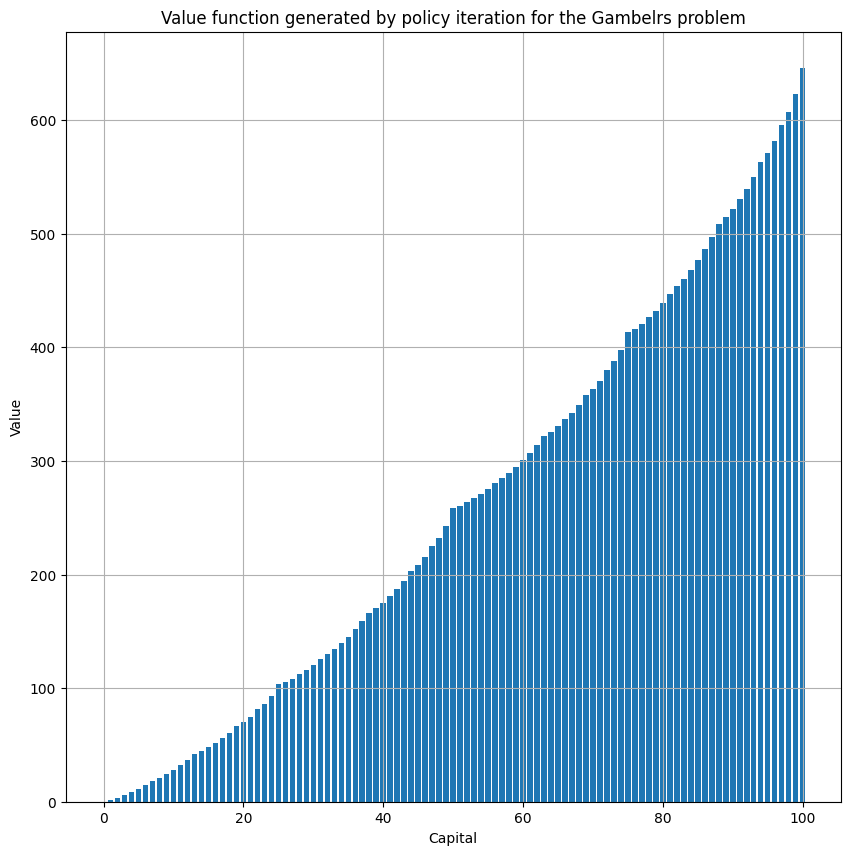

In [6]:
plt.figure(figsize=(10, 10))
plt.bar(
    gambling_problem.value_function.keys(), 
    gambling_problem.value_function.values()
)
plt.grid()
plt.title('Value function generated by policy iteration for the Gambelrs problem')
plt.ylabel('Value')
plt.xlabel("Capital")
plt.show()

## Policy results

In [7]:
betting_strategy = lambda capital: gambling_problem.policy[capital]

In [8]:
victories, games = gambler.play_games(
    n_games=100_000,
    betting_strategy=betting_strategy,
    heads_probability=HEADS_PROBABILITY,
    initial_capital=None,
)

100%|██████████| 100000/100000 [00:00<00:00, 153330.46it/s]


In [9]:
print(f"Winning rate: {np.sum(victories) / len(victories):.0%}.")

Winning rate: 40%.


### Betting analysis

See the box plot below to understand the distributions of number of bets and outliers in the data.

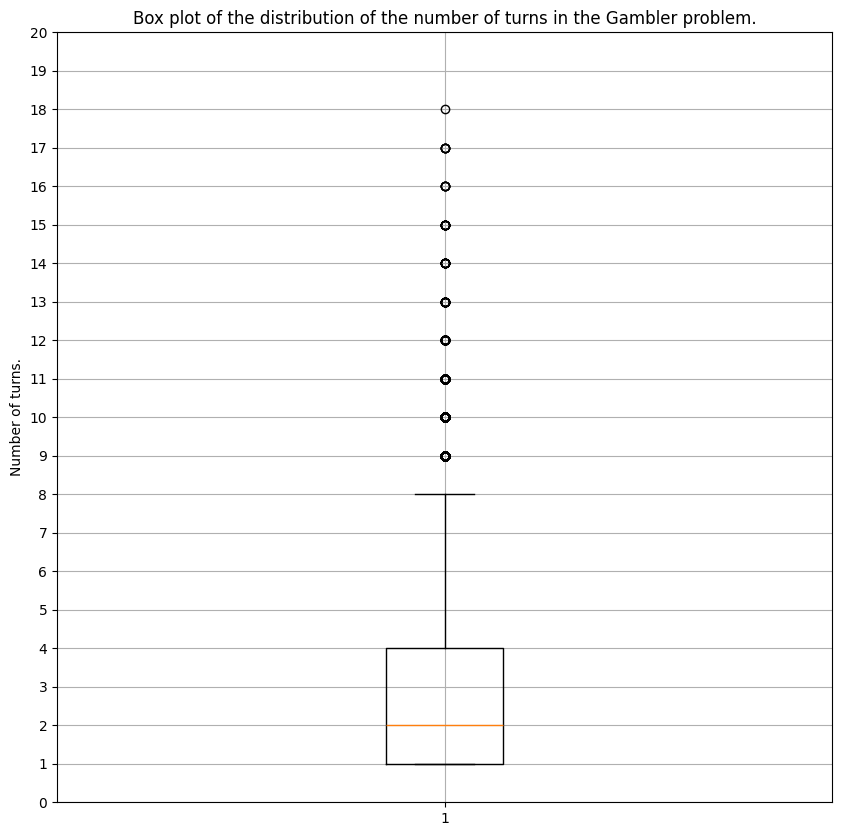

In [10]:
game_lengths = list(map(len,games))
plt.figure(figsize=(10, 10))
plt.boxplot(game_lengths)
plt.grid(True)
plt.yticks(np.arange(0,21,1))
plt.ylabel('Number of turns.')
plt.title('Box plot of the distribution of the number of turns in the Gambler problem.')
plt.show()

# Random chance results

In [11]:
def random_bet(current_capital: int) -> int:
    upper_bound = min(current_capital, 100 - current_capital)
    return np.random.randint(0, upper_bound + 1)

In [12]:
victories, games = gambler.play_games(
    n_games=100_000,
    betting_strategy=random_bet,
    heads_probability=HEADS_PROBABILITY,
    initial_capital=None,
)

100%|██████████| 100000/100000 [00:04<00:00, 24620.77it/s]


In [13]:
print(f"Winning rate: {np.sum(victories) / len(victories):.0%}.")

Winning rate: 32%.


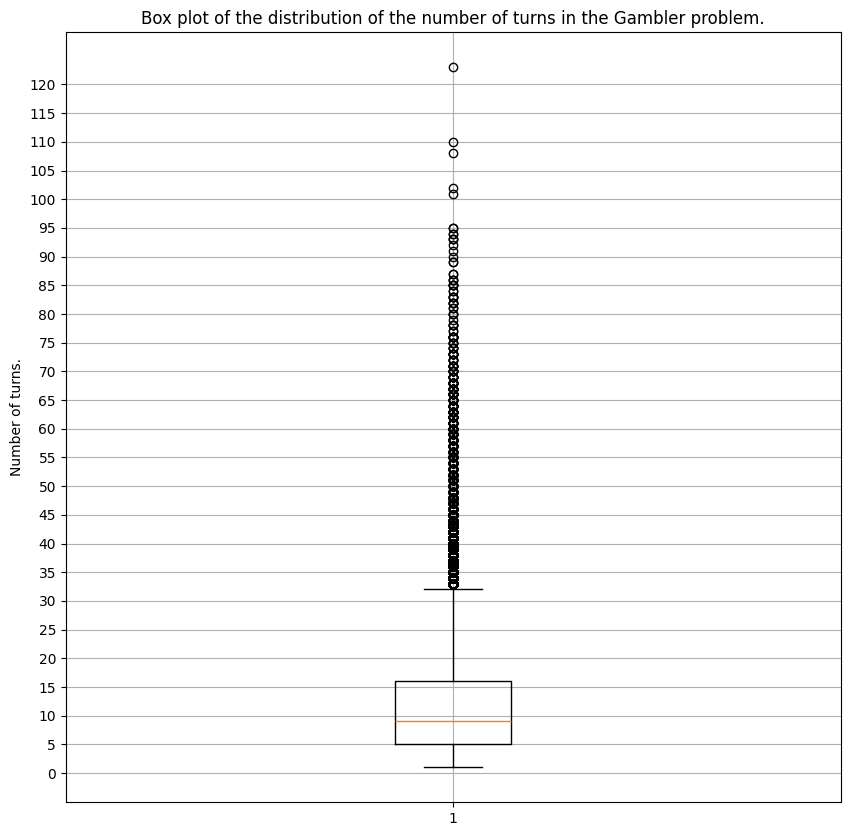

In [14]:
game_lengths = list(map(len, games))
plt.figure(figsize=(10, 10))
plt.boxplot(game_lengths)
plt.grid(True)
plt.yticks(np.arange(0, 121, 5))
plt.ylabel("Number of turns.")
plt.title("Box plot of the distribution of the number of turns in the Gambler problem.")
plt.show()